## Imports

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import csv
import re

## Soup Creation

In [9]:
query = '@realDonaldTrump'
url = "https://twitter.com/" + query

urlClient = urlopen(url)
page = urlClient.read()
urlClient.close()

pageSoup = soup(page , "html.parser")

dataFileHeaders = "Name,Account Status,Account Bio,Location,Joining Details,Instagram Handle,Tweet Count,Follower Count,Following Count\n"
tweetFileHeaders = "Tweet,Replies,Retweets,Likes\n"

## Structure Breakdown

In [10]:
profileLeftNav = pageSoup.findAll("div" , {"class" : "ProfileSidebar ProfileSidebar--withLeftAlignment"})
profileGridCell = pageSoup.findAll("div" , {"class" : "Grid-cell u-size2of3 u-lg-size3of4"})
timeline = pageSoup.findAll("div" , {"class" : "ProfileTimeline"})
tweetContainer = pageSoup.findAll("div" , {"class" : "js-tweet-text-container"})
tweetFooter = pageSoup.findAll("div" , {"class" : "ProfileTweet-actionCountList u-hiddenVisually"})

## Scraping Left Navigation and Writing the same

In [11]:
try: 
    dataFile = open("./tmp/" + query.strip().replace("@","") + ".csv" , "w")
    dataFile.write(dataFileHeaders)
    
    for element,details in zip(profileLeftNav,profileGridCell):
        name = element.findAll("a" , {"class" : "ProfileHeaderCard-nameLink u-textInheritColor js-nav"})[0].text
        accountStatus = element.div.h1.findAll("a" , {"class" : "js-tooltip"})[0].text
        accountBio = element.findAll("p" , {"class" : "ProfileHeaderCard-bio u-dir"})[0].text
        location = element.findAll("span" , {"class" : "ProfileHeaderCard-locationText u-dir"})[0].text
        joinedDetails = element.find("span" , {"class" : "ProfileHeaderCard-joinDateText js-tooltip u-dir"})['title']
        instagramLink = element.find("a" , {"class" : "u-textUserColor"})['title']

        tweetCount = details.find("li" , {"class" : "ProfileNav-item ProfileNav-item--tweets is-active"}).a.find("span" , {"class" : "ProfileNav-value"})['data-count']
        followingCount =  details.find("li" , {"class" : "ProfileNav-item ProfileNav-item--following"}).a.find("span" , {"class" : "ProfileNav-value"})['data-count']
        followerCount = details.find("li" , {"class" : "ProfileNav-item ProfileNav-item--followers"}).a.find("span" , {"class" : "ProfileNav-value"})['data-count']   

    dataFile.write(name.strip().replace(",","") + "," + accountStatus.strip().replace(",","") + "," + accountBio.strip().replace(",","") + "," + location.strip().replace(",","") + "," + joinedDetails.strip().replace(",","") + "," + instagramLink.strip().replace(",","") + "," + tweetCount.strip().replace(",","") + "," + followerCount.strip().replace(",","") + "," + followingCount.strip().replace(",","") + "\n")  

except Exception as e:
    print("Something went wrong")
    print(e)

finally:
    dataFile.close()


## Tweets of the account and writing the same

In [12]:
try:
    tweetsFile = open("./tmp/" + query.replace("@","") + "tweets" + ".csv" , "w")
    tweetsFile.write(tweetFileHeaders)

    for iterator in range(0,len(tweetContainer)):
        tweet = tweetContainer[iterator].text.strip()
        replies = "".join(re.findall("[^a-z\s,]",tweetFooter[iterator].text.replace("\n"," ").strip().split("     ")[0])).replace(",","")
        retweets = "".join(re.findall("[^a-z\s,]",tweetFooter[iterator].text.replace("\n"," ").strip().split("     ")[1])).replace(",","")
        likes = "".join(re.findall("[^a-z\s,]",tweetFooter[iterator].text.replace("\n"," ").strip().split("     ")[2])).replace(",","")
        tweetsFile.write(tweet.replace("," , "") + "," + replies + "," + retweets + "," + likes + "\n")
except Exception as e:
    print("Something went wrong")
    print(e)
finally:
    tweetsFile.close()

## Reading live-time tweets for the query, putting it in the dataframe

In [13]:
import pandas
tweetFrame = pandas.read_csv("./tmp/" + query.replace("@","") + "tweets" + ".csv" , encoding = "ISO-8859-1")
accountDetailsFrame = pandas.read_csv("./tmp/" + query.strip().replace("@","") + ".csv")
accountDetailsFrame['Handle'] = query
accountDetailsFrame.set_index('Handle')

,Name,Account Status,Account Bio,Location,Joining Details,Instagram Handle,Tweet Count,Follower Count,Following Count
Handle,,,,,,,,,
@realDonaldTrump,Donald J. Trump,Verified account,45th President of the United States of America,Washington DC,6:46 AM - 18 Mar 2009,http://www.Instagram.com/realDonaldTrump,39946,56246667,46


In [15]:
tweetFrame

,Tweet,Replies,Retweets,Likes
0,Judge Ken Starr former Solicitor Generel & Ind...,8484,5650,19672
1,At the request of many I will be reviewing the...,4973,7036,24707
2,Remember Michael Cohen only became a Rat aft...,18324,10828,38012
3,So where are all the missing Text messages bet...,11764,10415,37918
4,A REAL scandal is the one sided coverage hour ...,21379,9955,37799
5,Wow 19000 Texts between Lisa Page and her love...,37357,31401,103931
6,The pathetic and dishonest Weekly Standard run...,27888,20664,89921
7,Never in the history of our Country has the p...,45351,33480,124586
8,.......The Trump Administration will be announ...,12572,9983,54596
9,Secretary of the Interior @RyanZinke will be l...,15491,10794,56114


## Plotting the data

In [22]:
import matplotlib.pyplot as pyplot

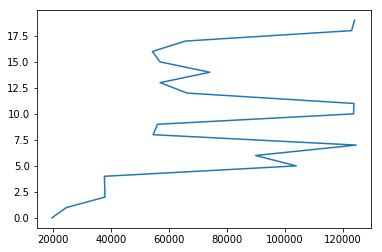

In [24]:
pyplot.plot(tweetFrame.Likes , tweetFrame.index)